# Stellar Classification
## Classification of stars based on their spectral characteristics. 

In [81]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv


This project is a Classification model using machine learning algorithms to classify the stars based on their spectral characteristics, which are Galaxies, Quasars (QSO) or Stars using the Dataset provided by the SDSS (Sloan Digital Sky Survey). Since the observations are described  by 17 features the dataset is called SDSS17. <br>
For more specific Information about the dataset, content and each feature column check the following kaggle link:<br>
https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

In [82]:
#import libraries
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the Data

In [83]:
#load the data
df = pd.read_csv('/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv')

### EDA - Exploratory Data Analysis

In [6]:
df.head() # first 5 entries

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427  
2  GALAXY  0.644195   4576  55592       299  
3  GALAXY  0.932346   9149  58039       775  
4  GALAXY  0.116123   6121  56187       842

In [7]:
df.tail() # last 5 entries

obj_ID       alpha      delta         u         g         r  \
99995  1.237679e+18   39.620709  -2.594074  22.16759  22.97586  21.90404   
99996  1.237679e+18   29.493819  19.798874  22.69118  22.38628  20.45003   
99997  1.237668e+18  224.587407  15.700707  21.16916  19.26997  18.20428   
99998  1.237661e+18  212.268621  46.660365  25.35039  21.63757  19.91386   
99999  1.237661e+18  196.896053  49.464643  22.62171  21.79745  20.60115   

              i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
99995  21.30548  20.73569    7778       301        2       581  1.055431e+19   
99996  19.75759  19.41526    7917       301        1       289  8.586351e+18   
99997  17.69034  17.35221    5314       301        4       308  3.112008e+18   
99998  19.07254  18.62482    3650       301        4       131  7.601080e+18   
99999  20.00959  19.28075    3650       301        4        60  8.343152e+18   

        class  redshift  plate    MJD  fiber_ID  
99995  GALAXY  0.000000   9374  57749       438  
99996  GALAXY  0.404895   7626  56934       866  
99997  GALAXY  0.143366   2764  54535        74  
99998  GALAXY  0.455040   6751  56368       470  
99999  GALAXY  0.542944   7410  57104       851

In [8]:
df.info() # infos about the rows and columns and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [9]:
df.isnull().sum() # checking missing values

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

We have 100000 entries with 18 columns of information and no empty values

In [10]:
df.corr() # the correlation between the columns

obj_ID     alpha     delta         u         g         r  \
obj_ID       1.000000 -0.013735 -0.301237  0.015310  0.015710  0.153891   
alpha       -0.013735  1.000000  0.138691 -0.001532 -0.002423 -0.022083   
delta       -0.301237  0.138691  1.000000  0.002074  0.003523 -0.006835   
u            0.015310 -0.001532  0.002074  1.000000  0.999311  0.054149   
g            0.015710 -0.002423  0.003523  0.999311  1.000000  0.062387   
r            0.153891 -0.022083 -0.006835  0.054149  0.062387  1.000000   
i            0.147670 -0.023580 -0.004480  0.045730  0.056271  0.962868   
z            0.013811 -0.002918  0.003630  0.998093  0.999161  0.053677   
run_ID       1.000000 -0.013737 -0.301238  0.015309  0.015710  0.153889   
rerun_ID          NaN       NaN       NaN       NaN       NaN       NaN   
cam_col     -0.046997  0.019582  0.032565  0.003548  0.003508  0.008480   
field_ID     0.031498 -0.165577 -0.173416 -0.008374 -0.008852 -0.026423   
spec_obj_ID  0.239461 -0.002553  0.112329  0.029997  0.039443  0.655245   
redshift     0.065400  0.001667  0.031638  0.014309  0.022954  0.433241   
plate        0.239460 -0.002554  0.112329  0.029997  0.039443  0.655243   
MJD          0.262687  0.019943  0.107333  0.031997  0.040274  0.671180   
fiber_ID     0.067178  0.030464  0.028250  0.016305  0.017470  0.223106   

                    i         z    run_ID  rerun_ID   cam_col  field_ID  \
obj_ID       0.147670  0.013811  1.000000       NaN -0.046997  0.031498   
alpha       -0.023580 -0.002918 -0.013737       NaN  0.019582 -0.165577   
delta       -0.004480  0.003630 -0.301238       NaN  0.032565 -0.173416   
u            0.045730  0.998093  0.015309       NaN  0.003548 -0.008374   
g            0.056271  0.999161  0.015710       NaN  0.003508 -0.008852   
r            0.962868  0.053677  0.153889       NaN  0.008480 -0.026423   
i            1.000000  0.055994  0.147668       NaN  0.007615 -0.026679   
z            0.055994  1.000000  0.013811       NaN  0.003365 -0.008903   
run_ID       0.147668  0.013811  1.000000       NaN -0.047098  0.031498   
rerun_ID          NaN       NaN       NaN       NaN       NaN       NaN   
cam_col      0.007615  0.003365 -0.047098       NaN  1.000000 -0.015684   
field_ID    -0.026679 -0.008903  0.031498       NaN -0.015684  1.000000   
spec_obj_ID  0.661641  0.037813  0.239460       NaN -0.001946 -0.083471   
redshift     0.492383  0.030380  0.065400       NaN  0.000097 -0.021331   
plate        0.661640  0.037813  0.239459       NaN -0.001949 -0.083471   
MJD          0.672523  0.037469  0.262687       NaN -0.006745 -0.095064   
fiber_ID     0.214787  0.014668  0.067165       NaN  0.121597 -0.012337   

             spec_obj_ID  redshift     plate       MJD  fiber_ID  
obj_ID          0.239461  0.065400  0.239460  0.262687  0.067178  
alpha          -0.002553  0.001667 -0.002554  0.019943  0.030464  
delta           0.112329  0.031638  0.112329  0.107333  0.028250  
u               0.029997  0.014309  0.029997  0.031997  0.016305  
g               0.039443  0.022954  0.039443  0.040274  0.017470  
r               0.655245  0.433241  0.655243  0.671180  0.223106  
i               0.661641  0.492383  0.661640  0.672523  0.214787  
z               0.037813  0.030380  0.037813  0.037469  0.014668  
run_ID          0.239460  0.065400  0.239459  0.262687  0.067165  
rerun_ID             NaN       NaN       NaN       NaN       NaN  
cam_col        -0.001946  0.000097 -0.001949 -0.006745  0.121597  
field_ID       -0.083471 -0.021331 -0.083471 -0.095064 -0.012337  
spec_obj_ID     1.000000  0.388642  1.000000  0.970167  0.241279  
redshift        0.388642  1.000000  0.388641  0.387109  0.127044  
plate           1.000000  0.388641  1.000000  0.970166  0.241258  
MJD             0.970167  0.387109  0.970166  1.000000  0.256970  
fiber_ID        0.241279  0.127044  0.241258  0.256970  1.000000

In [11]:
df.describe() # statistical infos of the columns

obj_ID          alpha          delta              u  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.237665e+18     177.629117      24.135305      21.980468   
std    8.438560e+12      96.502241      19.644665      31.769291   
min    1.237646e+18       0.005528     -18.785328   -9999.000000   
25%    1.237659e+18     127.518222       5.146771      20.352353   
50%    1.237663e+18     180.900700      23.645922      22.179135   
75%    1.237668e+18     233.895005      39.901550      23.687440   
max    1.237681e+18     359.999810      83.000519      32.781390   

                   g              r              i              z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.531387      19.645762      19.084854      18.668810   
std        31.750292       1.854760       1.757895      31.728152   
min     -9999.000000       9.822070       9.469903   -9999.000000   
25%        18.965230      18.135828      17.732285      17.460677   
50%        21.099835      20.125290      19.405145      19.004595   
75%        22.123767      21.044785      20.396495      19.921120   
max        31.602240      29.571860      32.141470      29.383740   

              run_ID  rerun_ID        cam_col       field_ID   spec_obj_ID  \
count  100000.000000  100000.0  100000.000000  100000.000000  1.000000e+05   
mean     4481.366060     301.0       3.511610     186.130520  5.783882e+18   
std      1964.764593       0.0       1.586912     149.011073  3.324016e+18   
min       109.000000     301.0       1.000000      11.000000  2.995191e+17   
25%      3187.000000     301.0       2.000000      82.000000  2.844138e+18   
50%      4188.000000     301.0       4.000000     146.000000  5.614883e+18   
75%      5326.000000     301.0       5.000000     241.000000  8.332144e+18   
max      8162.000000     301.0       6.000000     989.000000  1.412694e+19   

            redshift          plate            MJD       fiber_ID  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean        0.576661    5137.009660   55588.647500     449.312740  
std         0.730707    2952.303351    1808.484233     272.498404  
min        -0.009971     266.000000   51608.000000       1.000000  
25%         0.054517    2526.000000   54234.000000     221.000000  
50%         0.424173    4987.000000   55868.500000     433.000000  
75%         0.704154    7400.250000   56777.000000     645.000000  
max         7.011245   12547.000000   58932.000000    1000.000000

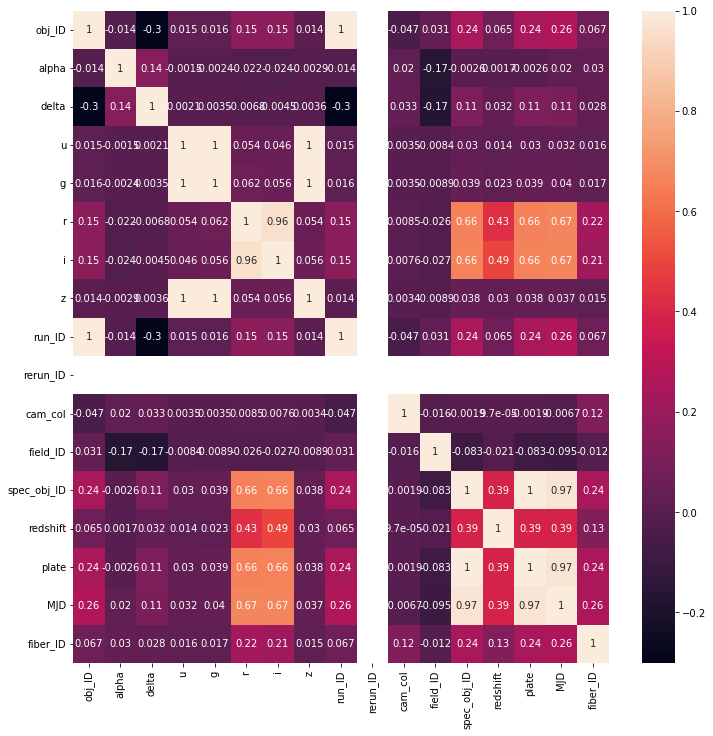

In [12]:
# Correlation of the columns shown in a heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True);

In [71]:
df.shape

(100000, 18)

In [13]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

Getting infos about the 'class' column.

In [14]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

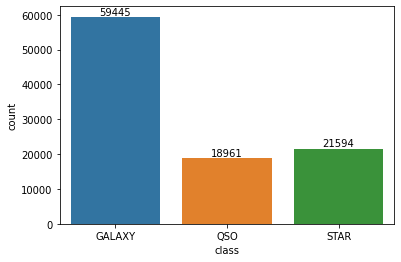

In [15]:
ax=sns.countplot(x=df["class"]);
ax.bar_label(ax.containers[0]);

We can see that we have imbalanced data

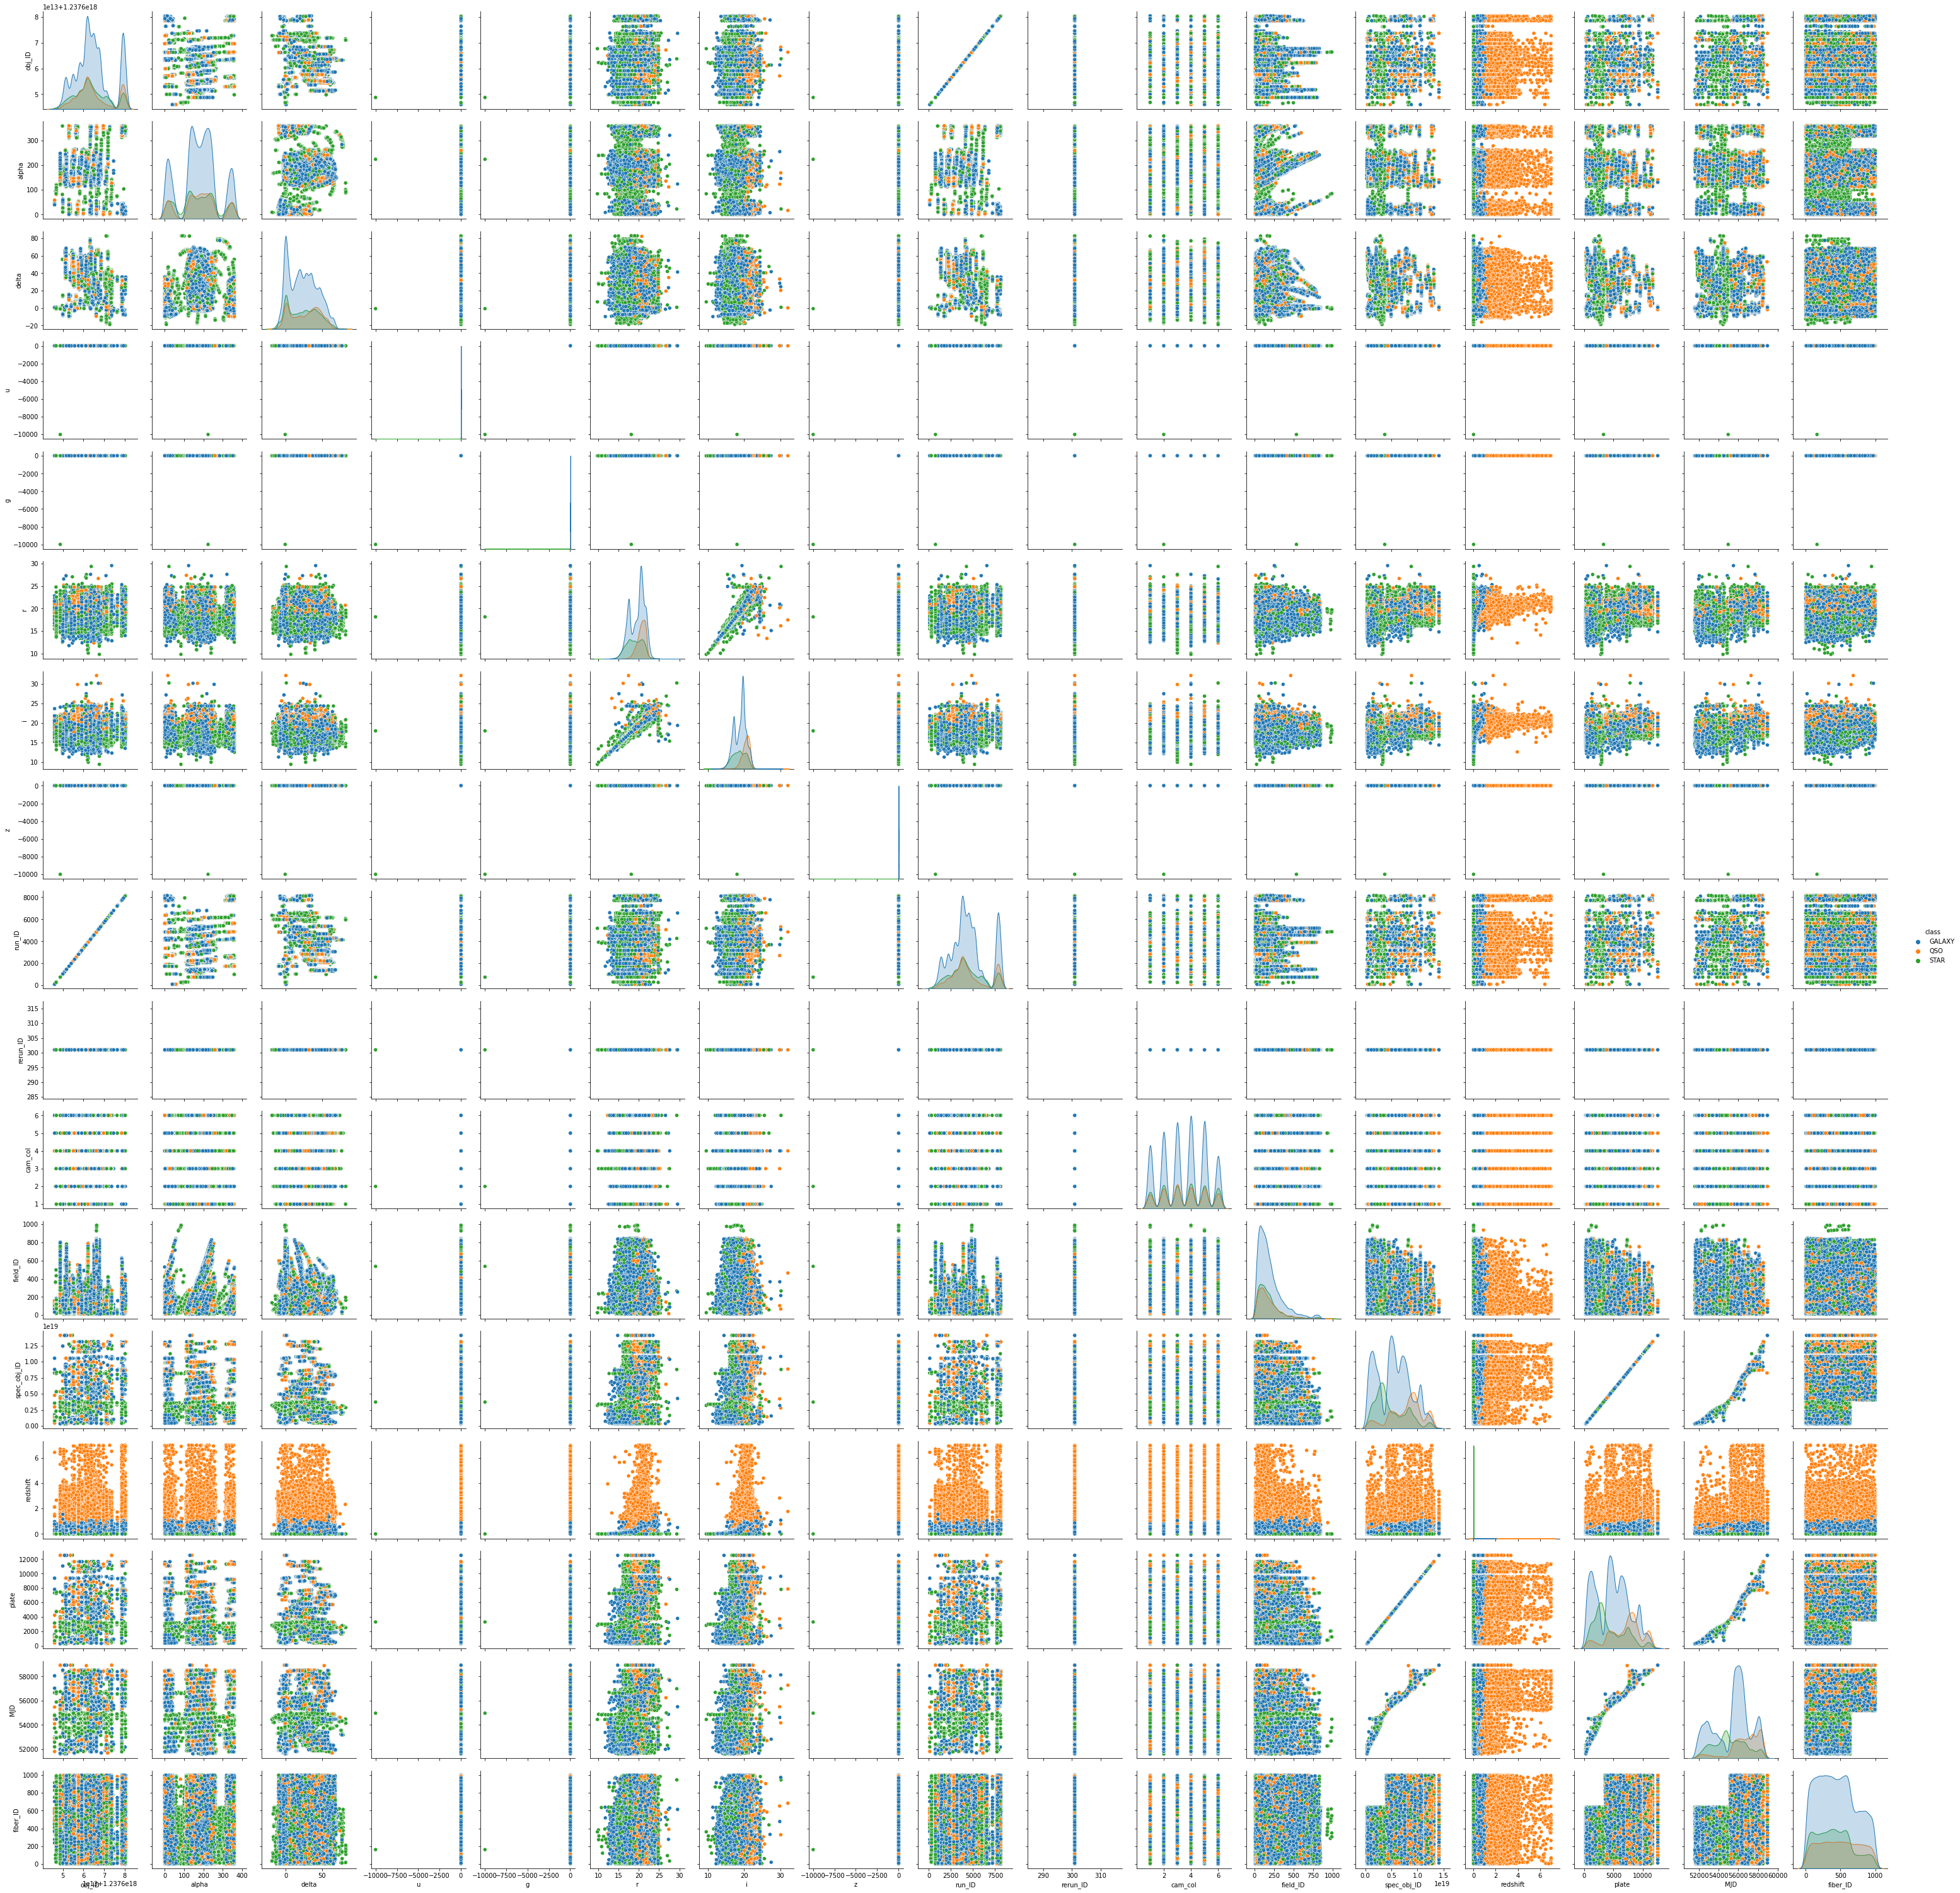

In [18]:
sns.pairplot(df,hue="class");

We can see that **redshift** has a clear difference between the class types. so we can assume that it plays a significant role in the stellar classification

### Feature Engineering

In [84]:
# drop unnecessary columns
df.drop(['obj_ID','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis = 1, inplace=True)

In [85]:
# mapping numbers to class types
df["class"]=df["class"].map({"GALAXY":0,"STAR":1,"QSO":2})

In [86]:
# check the correlation of class column to other columns
abs(df.corr()["class"].sort_values(ascending=False))

class          1.000000
redshift       0.536822
i              0.284396
plate          0.215722
spec_obj_ID    0.215722
MJD            0.207262
r              0.150691
delta          0.056643
z              0.017352
alpha          0.004552
g              0.005915
u              0.017701
Name: class, dtype: float64

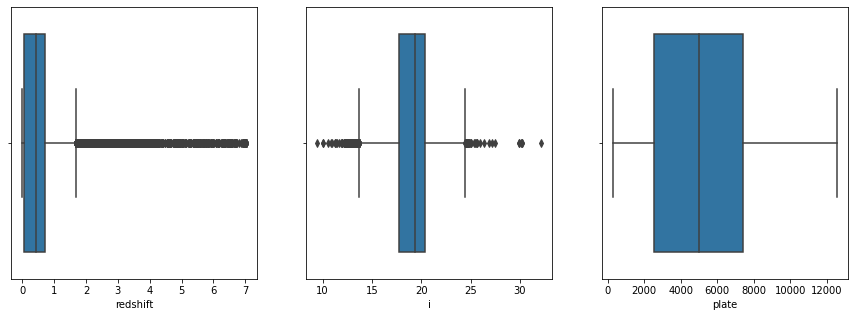

In [87]:
fig = plt.figure(figsize=(15, 5))
fig.add_subplot(1, 3, 1)
sns.boxplot(x=df['redshift'])
fig.add_subplot(1, 3, 2)
sns.boxplot(x=df['i'])
fig.add_subplot(1, 3, 3)
sns.boxplot(x=df['plate']);

### Detecting Outliers

In [88]:
outliers = df.quantile(.97)
df = df[(df['redshift']<outliers['redshift'])]
df = df[(df['i']<outliers['i'])]
df = df[(df['plate']<outliers['plate'])]

### Oversampling Imbalanced Data - SMOTE

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


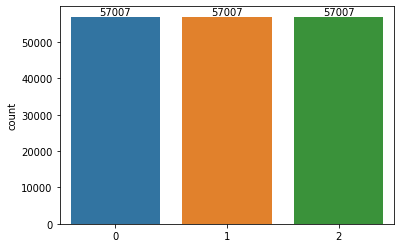

In [89]:
from imblearn.over_sampling import SMOTE
# assign x and y
x = df.drop(['class'], axis = 1)
y = df.loc[:,'class'].values

# using oversampling with SMOTE to deal with imbalanced data
sm = SMOTE(random_state=42)
x, y = sm.fit_resample(x, y)

# Plot the oversampled data
ax=sns.countplot(y);
ax.bar_label(ax.containers[0]);

### Scale the Data - Data Standartization

In [90]:
from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()
scale = ssc.fit_transform(x) # use standard scaler to scale the data

### Modeling

In [91]:
# assign x and y values
x,y=df.drop("class",axis=1),df[['class']]

In [92]:
from sklearn.model_selection import train_test_split
# split the data to train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((73205, 11), (18302, 11), (73205, 1), (18302, 1))

In [ ]:
# Classification Algorithms
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

g=GaussianNB()
b=BernoulliNB()
k=KNeighborsClassifier()
l=LogisticRegression()
d=DecisionTreeClassifier()
r=RandomForestClassifier()
gb=GradientBoostingClassifier()

# fit and predict model
g.fit(x,y)
b.fit(x,y)
k.fit(x,y)
l.fit(x,y)
d.fit(x,y)
r.fit(x,y)
gb.fit(x,y)

predG=g.predict(x)
predB=b.predict(x)
predK=k.predict(x)
predL=l.predict(x)
predD=d.predict(x)
predR=r.predict(x)
predGB=gb.predict(x)

In [105]:
print('Accuracy Scores:') # print the accuracy scores
print("GaussianNB: ", accuracy_score(predG,y))
print("BernoulliNB: ", accuracy_score(predB,y))
print("KNeighbours: ", accuracy_score(predK,y))
print("LogisticReg: ", accuracy_score(predL,y))
print("DecisionTree: ", accuracy_score(predD,y))
print("RandomForest: ", accuracy_score(predR,y))
print("GradientBoosting: ", accuracy_score(predGB,y))

Accuracy Scores:
GaussianNB:  0.6230561596380605
BernoulliNB:  0.7627831750576458
KNeighbours:  0.7939174052258298
LogisticReg:  0.6229796627580404
DecisionTree:  1.0
RandomForest:  1.0
GradientBoosting:  0.9799250330575803


The **GradientBoosting Classifier** shows the highest accuracy with _98%_, followed by the KNeighbours Classifier with 79% and BernoulliNB with 76%

In [113]:
# Confusion matrix and Classification reports of top 3 algos

In [106]:
confusion_matrix(predGB,y)

array([[56465,    48,  1245],
       [   50, 20720,     2],
       [  492,     0, 12485]])

In [108]:
print(classification_report(predGB,y))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     57758
           1       1.00      1.00      1.00     20772
           2       0.91      0.96      0.93     12977

    accuracy                           0.98     91507
   macro avg       0.97      0.98      0.97     91507
weighted avg       0.98      0.98      0.98     91507



In [109]:
confusion_matrix(predK,y)

array([[54025,  7132,  6261],
       [ 1447, 12582,  1429],
       [ 1535,  1054,  6042]])

In [110]:
print(classification_report(predK,y))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87     67418
           1       0.61      0.81      0.69     15458
           2       0.44      0.70      0.54      8631

    accuracy                           0.79     91507
   macro avg       0.66      0.77      0.70     91507
weighted avg       0.84      0.79      0.81     91507



In [111]:
confusion_matrix(predB,y)

array([[56628,  7596, 13732],
       [  379, 13172,     0],
       [    0,     0,     0]])

In [112]:
print(classification_report(predB,y))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84     77956
           1       0.63      0.97      0.77     13551
           2       0.00      0.00      0.00         0

    accuracy                           0.76     91507
   macro avg       0.54      0.57      0.54     91507
weighted avg       0.94      0.76      0.83     91507



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
